# Задание 1#

### Напишем генерацию точек: ###
#### 1) Разделяемый набор ####
Генерируем произвольную прямую через 3 случайных числа (коэффициентов уравнения $ax + by + c = 0$). Затем генерируем случайное количество точек с каждой стороны. Каждая точка описывается 2-мя цифрами: расстояние от прямой и координата проекции.

In [3]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from math import log
%matplotlib inline

In [317]:
LINE_COEFF = 100.
POINTS_COEFF = 1
POINTS_NUMBER = 1000

#Вывод графиков

def plot_points(points, line=None):
    fig = plt.figure(figsize=(15, 10))    
    plot_points = np.array(points)
    
    plt.axis([np.min(plot_points[0, :, 0]),
              np.max(plot_points[1, :, 0]),
              np.min(plot_points[1, :, 1]),
              np.max(plot_points[0, :, 1])])

    plt.scatter(plot_points[0, :, 0], plot_points[0, :, 1], color='blue')
    plt.scatter(plot_points[1, :, 0], plot_points[1, :, 1], color='red')
    if (not line == None):
        line_x = [0, POINTS_COEFF]
        line_y = [-(line[0] * line_x[0] + line[2]) / line[1], 
                  -(line[0] * line_x[1] + line[2]) / line[1]]
        plt.plot(line_x, line_y, color='black', linewidth=10)
    plt.show()

In [318]:
def get_line_y(curr_x, line):
    return (-1.) * (line[2] + line[0] * curr_x) / line[1]

def get_side(index):
    if index == 0:
        return 1
    if index == 1:
        return -1
    
def generate_point(line, j):
    x = random.random() * POINTS_COEFF
    return [x, get_line_y(x, line) + (random.random() * POINTS_COEFF * get_side(j))]
    
line = [random.random() * LINE_COEFF for i in range(3)]

points_devide = [[generate_point(line, j)
             for i in range(POINTS_NUMBER)] 
            for j in range(2)]

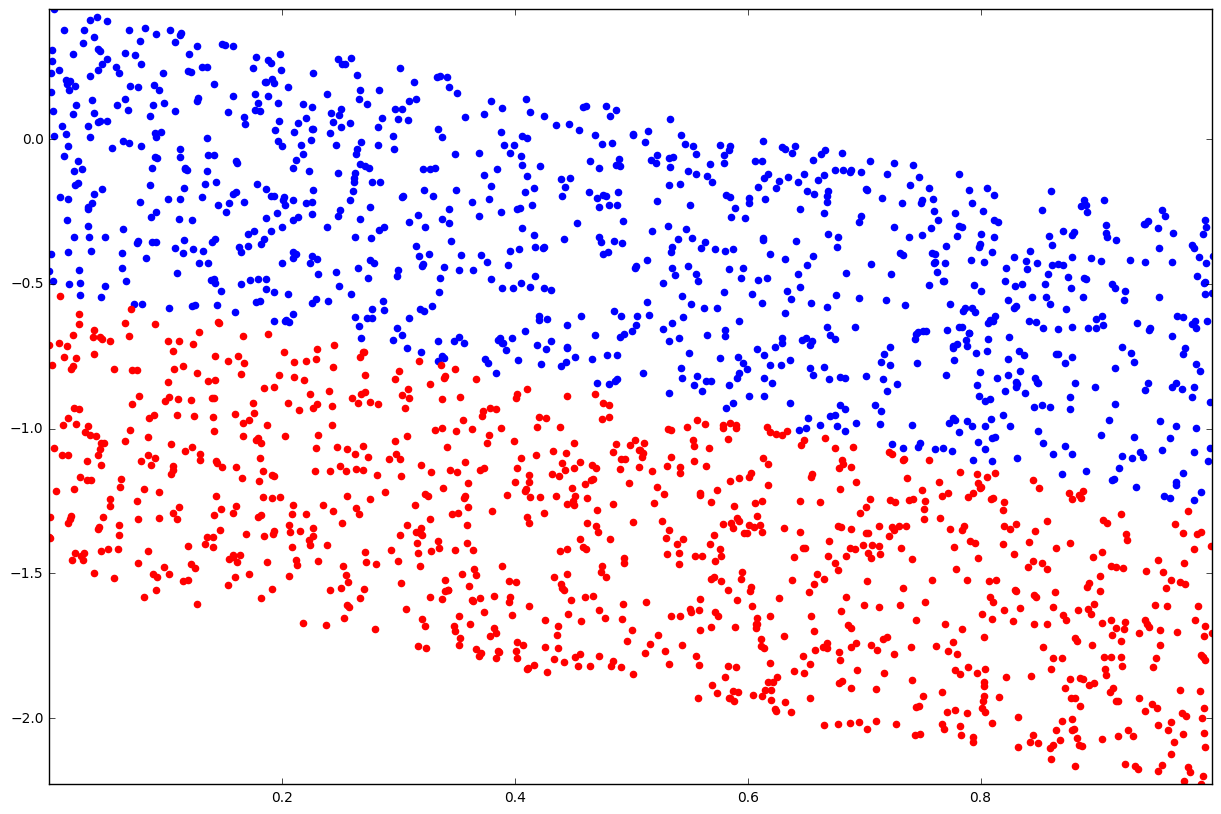

In [319]:
plot_points(points_devide)

#### 2) Неразделяемый набор ####
Просто генерируем большое количество случайных точек

In [320]:
points_nondevide = [[[random.random() * POINTS_COEFF, random.random() * POINTS_COEFF]
             for i in range(POINTS_NUMBER)] 
            for j in range(2)]

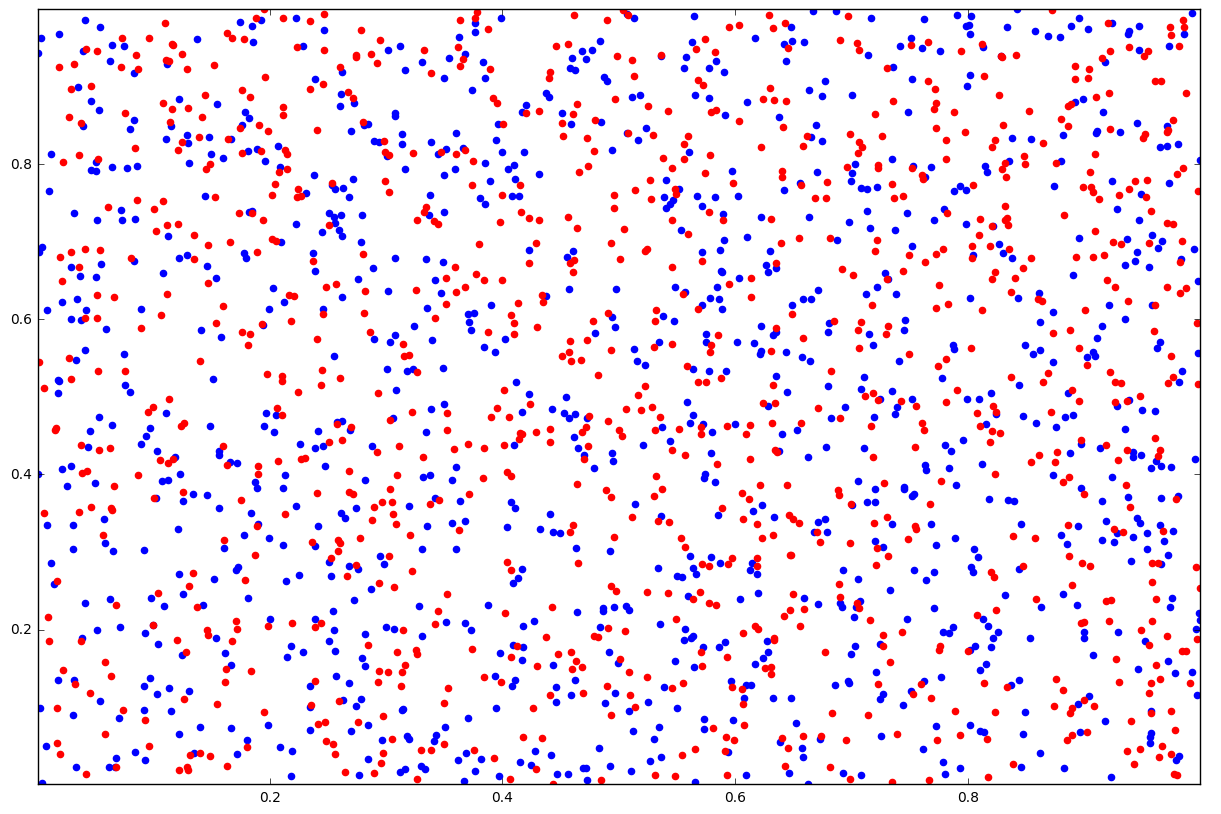

In [321]:
plot_points(points_nondevide)

### Метод градиентного спуска ###

#### Градиент функции ####

Найдём его аналитически:

$$ Q \left( \omega \right) = \sum\limits_{i=1}^{m}{ln \left( 1 + e^{-y_i \left<x_i, \omega \right> } \right) } $$:
$$ \cfrac{ d Q}{ d \omega_j} = \sum\limits_{i = 1}^{m}{\cfrac{-y_i x_i^j e^{-y_i\left< x_i, \omega \right>}}{1 + e^{-y_i\left< x_i, \omega\right>}}}$$

#### Описание алгоритма ####

Для начала, всем точкам добавим первою координату, равную $-1$.
Затем запустим градиентный спуск, где $\lambda$ будет каждый раз уменьшаться в константное количество раз, а индикатором отсановки будет мальнькое расстояние между соседними итерациями алгоритма.

In [389]:
def upgrade_points(points_first, points_second):
    points = [np.array([-1] + i) for i in points_first] \
           + [np.array([-1] + i) for i in points_second]
    classes = [-1 for i in range(len(points_first))] \
            + [1 for i in range(len(points_second))]
    return np.array(points), np.array(classes)


def FUNC_GRAD(curr_point, points, index, dimention, classes):
    scalar = (points * curr_point).sum(axis=1)
    return (((-1) * classes * points[:, index]) \
           + classes * points[:, index] \
           / (1 + np.exp((-1) * classes * scalar))).sum()


def LAMBD():
    global LAMBDA
    LAMBDA *= 0.998
    return LAMBDA

def LAMBD_2():
    return 1e-5


def get_new_point(curr_point, points, func_grad, lambd, dimention, classes):
    return np.array([curr_point[i] - (lambd() \
            * func_grad(curr_point, points, i, dimention, classes))
            for i in range(dimention + 1)])
    
    
def stop_condition(curr_point, next_point, eps):
    return ((curr_point - next_point) ** 2).sum() ** 0.5 < eps


def gradient_down(start_point, points, func_grad, lambd, dimention, classes, eps):
    curr_point = start_point
    new_point = get_new_point(curr_point, points, 
                              func_grad, lambd, 
                              dimention, classes)
    counter = 0   
    while (not stop_condition(curr_point, new_point, eps)):
        counter += 1
        curr_point = new_point
        new_point = get_new_point(curr_point, points, 
                                  func_grad, lambd, dimention, classes)
    return new_point, counter

### Запустим наш алгоритм на разделяемом наборе: ###

In [328]:
EPS = 10e-9
DIMENTION = 2
LAMBDA = 10

start_point = np.array([1, 1, 1])
points, classes = upgrade_points(points_devide[0], points_devide[1])

answer, counter = gradient_down(start_point, points, 
                                FUNC_GRAD, LAMBD, 
                                DIMENTION, classes, EPS)
answer = [answer[1], answer[2], -answer[0]]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


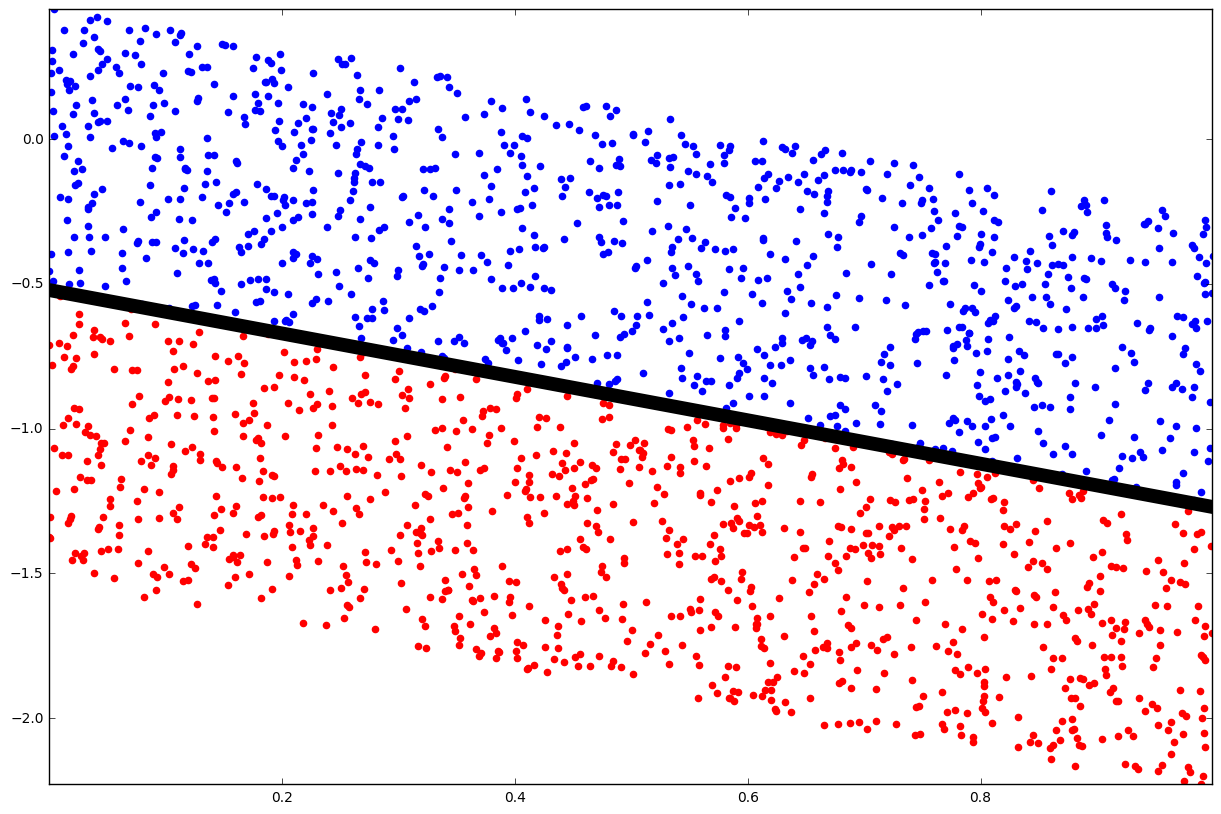

In [329]:
plot_points(points_devide, line=answer)

### И на неразделяемом: ###

In [330]:
EPS = 10e-9
DIMENTION = 2
LAMBDA = 10
start_point = np.array([1, 1, 1])
points, classes = upgrade_points(points_nondevide[0], points_nondevide[1])

answer, counter = gradient_down(start_point, points, 
                                FUNC_GRAD, LAMBD, 
                                DIMENTION, classes, EPS)
answer = [answer[1], answer[2], -answer[0]]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


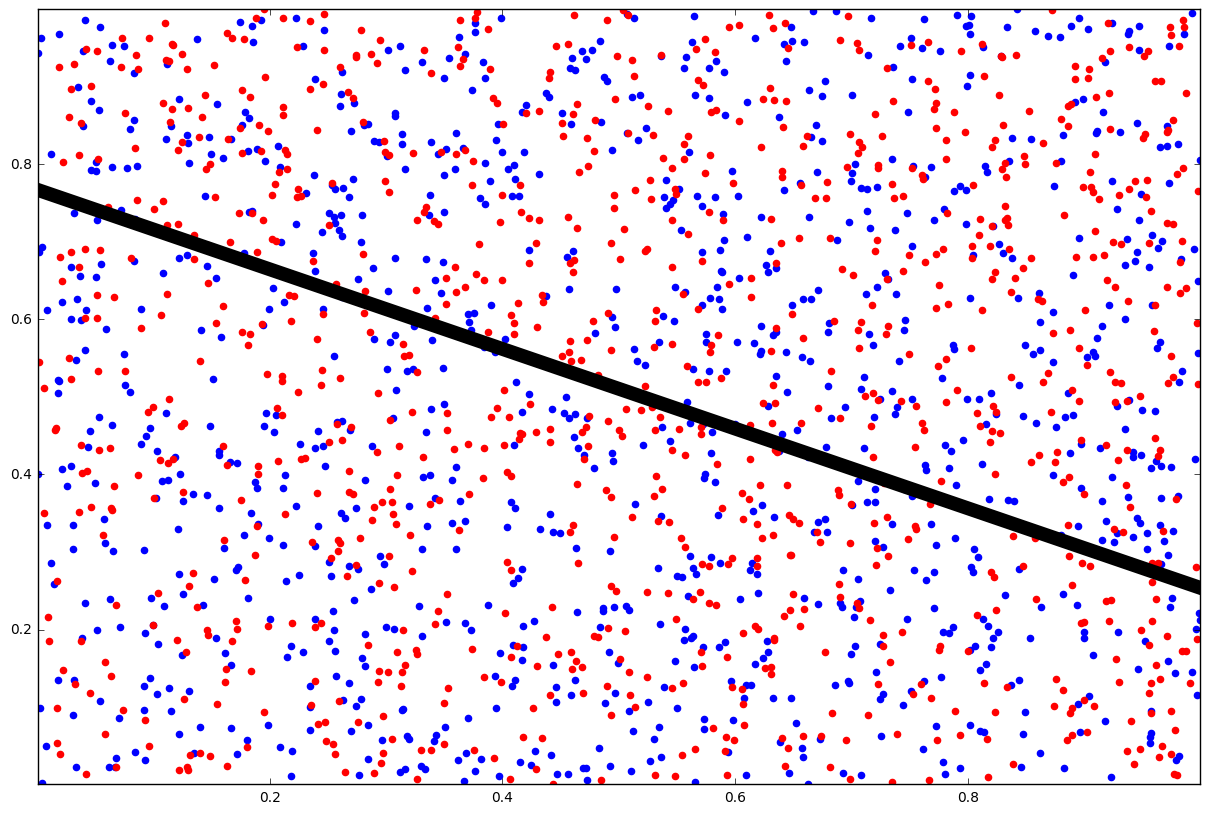

In [331]:
plot_points(points_nondevide, line=answer)

### Посмотрим на зависимость количества шагов от точности: ###

In [395]:
eps = [10 ** (-i) for i in range(1, 12)]
eps = eps[::-1]

DIMENTION = 2
start_point = np.array([1, 1, 1])
points, classes = upgrade_points(points_nondevide[0], points_nondevide[1])
counters_first = []
counters_second = []

for curr_eps in eps:
    LAMBDA = 10
    answer, counter = gradient_down(start_point, points, 
                                FUNC_GRAD, LAMBD, 
                                DIMENTION, classes, curr_eps)
    counters_first.append(counter)
    
    answer, counter = gradient_down(start_point, points, 
                                FUNC_GRAD, LAMBD_2, 
                                DIMENTION, classes, curr_eps)
    counters_second.append(counter)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


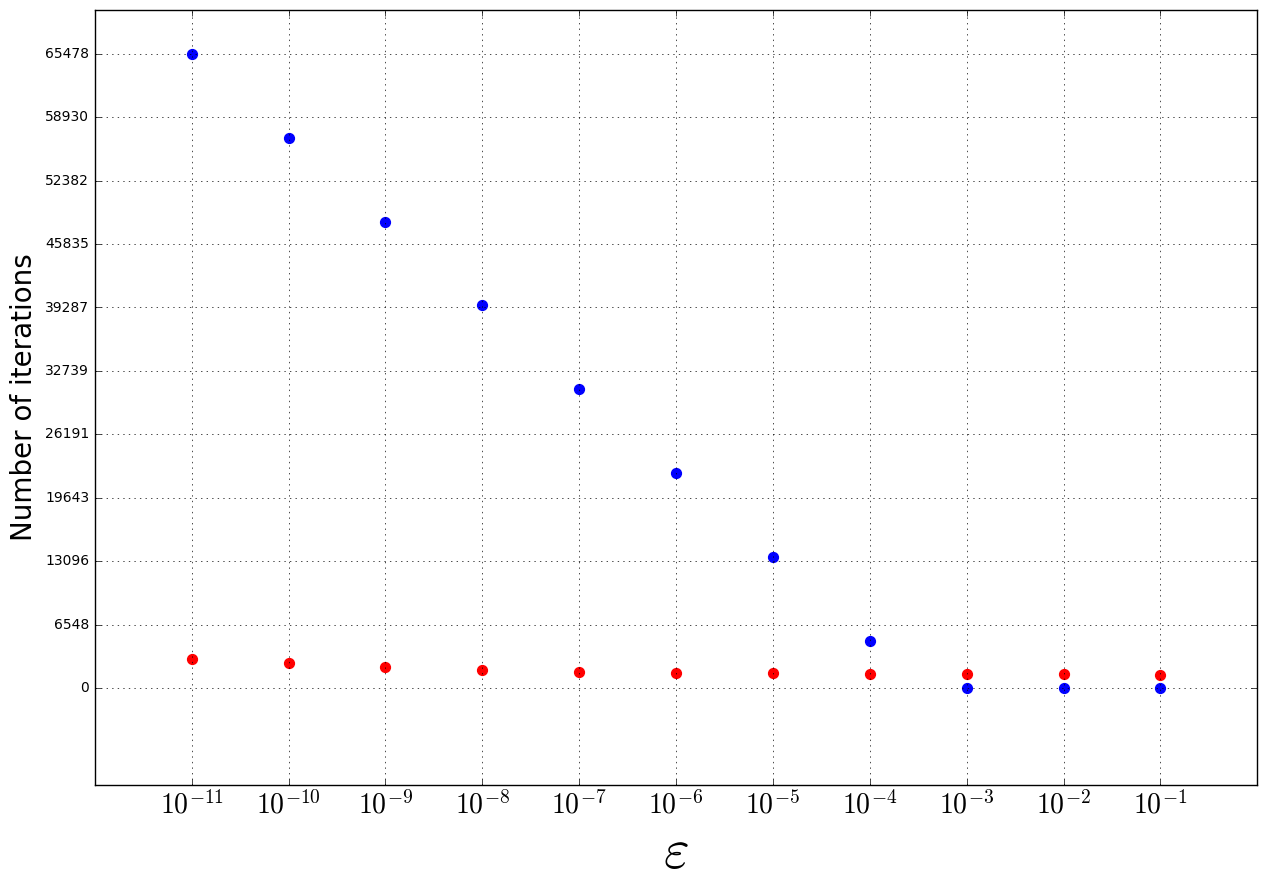

In [394]:
axis_font = {'size':'20'}
axis_font_eps = {'size':'40'}
x = [i for i in range(1, 12)]

fig = plt.figure(figsize=(15, 10))    
plt.scatter(x, counters_first, color='red', s=50, label=r'decreasing $\lambda$')
plt.scatter(x, counters_second, color='blue', s=50, label=r'constant $\lambda$')
plt.xlabel(r'$\varepsilon$', **axis_font_eps)
plt.ylabel(r'Number of iterations', **axis_font)
plt.xticks(x, list(map(lambda curr: r'$10^{-' + str(curr) + '}$', x[::-1])), **axis_font)
plt.yticks(np.linspace(np.max(counters_second), np.min(counters_second), 11))
plt.grid(True)
plt.show()

Как мы видим, примальньких $\varepsilon$ метод с константным шагом показывает себя сильно хуже, однако с увелиением погрешности, он становится выгоднее по количеству итераций.

# Задание 2 #

### Реализация метода Ньютона ###
Приведём реализацию демпфированного метода Ньютона для решения задачи $$ solve_{x,x_s,y,y_s \ge 0} \left( F \left( x, x_s, y, y_s, \mu \right) = 0\right) $$

In [259]:
EPS = 1e-4
N = 3
M = 2
A = np.matrix([[1, 2, -3], 
               [-1, -1, 1]
              ])
b = np.matrix([2, 6]).T
c = np.matrix([4, 1, -1]).T

def diag(point, shape):
    return np.identity(shape).reshape((shape, shape)) \
    * np.array(point.T).reshape(point.shape[0])

def ones_vector(shape):
    return np.matrix(np.ones(shape)).T

def FUNC(point, mu):
    return np.concatenate(
            (
            A * point[:N, 0] + point[N:N+M, 0] - b, 
            
            A.T * point[N+M:N+M+M, 0] - point[N+M+M:, 0] - c,
            
            diag(point[:N, 0], N) * diag(point[N+M+M:, 0], N) \
            * ones_vector(N) - mu * ones_vector(N),
            
            diag(point[N+M:N+M+M, 0], M) * diag(point[N:N+M, 0], M) \
            * ones_vector(M) - mu * ones_vector(M)
        ),
        axis=0
    )
    

def count_gradient(curr_point, mu, func):
    eps = 1e-4
    deltas = np.identity(2 * (N + M)) * eps
    #print((func((curr_point + deltas)[:, 1], mu) - func(curr_point, mu)))
    return np.concatenate(
            ([(func((curr_point + deltas)[:, i], mu) - func(curr_point, mu)) / eps
             for i in range(2 * (N + M))]), axis=1).T.I
    

def new_point(curr_point, mu, func):
    #print(count_gradient(curr_point, mu, func) * func(curr_point, mu))
    return curr_point - (count_gradient(curr_point, mu, func) * func(curr_point, mu))

def newton(func, start_point, mu):
    curr_point = start_point
    while (np.array((func(curr_point, mu))) ** 2).sum() > EPS:
        #print((curr_point))
        #if ((np.array((func(curr_point, mu))) ** 2).sum() < 10):
        print((np.array((func(curr_point, mu))) ** 2).sum())
        curr_point = new_point(curr_point, mu, func)
    return curr_point

In [260]:
newton(FUNC, np.matrix([1,1,1,1,1,1,1,1,1,1]).T, 10)


472.0
471.97089015
471.941860226
471.912910208
471.884040075
471.855249805
471.826539378
471.797908773
471.769357968
471.740886943
471.712495677
471.684184149
471.655952338
471.627800224
471.599727785
471.571735002
471.543821852
471.515988316
471.488234374
471.460560003
471.432965185
471.405449898
471.378014121
471.350657835
471.323381019
471.296183653
471.269065715
471.242027187
471.215068047
471.188188275
471.16138785
471.134666754
471.108024965
471.081462464
471.05497923
471.028575243
471.002250483
470.97600493
470.949838564
470.923751365
470.897743314
470.871814389
470.845964572
470.820193843
470.794502181
470.768889567
470.743355981
470.717901404
470.692525816
470.667229196
470.642011526
470.616872786
470.591812956
470.566832017
470.54192995
470.517106734
470.49236235
470.467696779
470.443110002
470.418602
470.394172752
470.369822239
470.345550443
470.321357345
470.297242924
470.273207162
470.249250039
470.225371538
470.201571637
470.17785032
470.154207565
470.130643355
470.107157

KeyboardInterrupt: 

In [222]:
m = np.matrix([[1,2], [3,4]])

x = np.array([1,2])
def func(a):
    return np.array([x*2, x*3])

func(x)

array([[2, 4],
       [3, 6]])

In [7]:
m.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [158]:
vec = np.matrix([1,2,3]).T
eps = 0.1
matr = np.identity(3) * np.array(vec.T).reshape((3))

print(matr)

def func(v):
    return v.sum()

print(vec - matr)
    
(func(np.array((vec - matr).T)) - func(vec))

[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  3.]]
[[ 0.  1.  1.]
 [ 2.  0.  2.]
 [ 3.  3.  0.]]


6.0